In [24]:
# Importing the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [25]:
# Loading the training Dataset
dataset_train = pd.read_csv("C:/Users/Archana/Desktop/NFLX.csv")


In [26]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [27]:
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,04-02-2022,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [28]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [29]:
dataset_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [30]:
dataset_train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
# Use the Open Stock Price Column to Train the Model.

training_set = dataset_train.iloc[:,1:2].values
print(dataset_train)
print(dataset_train.shape)

            Date        Open        High         Low       Close   Adj Close  \
0     05-02-2018  262.000000  267.899994  250.029999  254.259995  254.259995   
1     06-02-2018  247.699997  266.700012  245.000000  265.720001  265.720001   
2     07-02-2018  266.579987  272.450012  264.329987  264.559998  264.559998   
3     08-02-2018  267.079987  267.619995  250.000000  250.100006  250.100006   
4     09-02-2018  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  31-01-2022  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  01-02-2022  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  02-02-2022  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  03-02-2022  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  04-02-2022  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1    

In [32]:
# Normalizing the Dataset

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) 
scaled_train_set=scaler.fit_transform(training_set)
scaled_train_set

array([[0.06125254],
       [0.03005911],
       [0.07124314],
       ...,
       [0.46753051],
       [0.4090483 ],
       [0.3782257 ]])

In [33]:
# Creating X_train and y_train Data Structures.

X_train=[]
y_train=[]
for i in range(60,1009):
    X_train.append(scaled_train_set[i-60:i,0])
    y_train.append(scaled_train_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)

In [34]:
print(X_train.shape)
print(y_train.shape)

(949, 60)
(949,)


In [35]:
# Reshape the Data 

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(949, 60, 1)

In [36]:
# Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.

from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense
from keras.layers import Dropout

In [37]:
regressor=Sequential()

#Adding the first LSTM layer and some Dropout regularisation 
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

In [38]:
# Compiling the RNN(Recurrent Neural Networks)
regressor.compile(optimizer='adam',loss='mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
30/30 [==============================] - 26s 213ms/step - loss: 0.0362
Epoch 2/100
30/30 [==============================] - 6s 211ms/step - loss: 0.0080
Epoch 3/100
30/30 [==============================] - 6s 199ms/step - loss: 0.0079
Epoch 4/100
30/30 [==============================] - 6s 207ms/step - loss: 0.0065
Epoch 5/100
30/30 [==============================] - 6s 195ms/step - loss: 0.0074
Epoch 6/100
30/30 [==============================] - 6s 207ms/step - loss: 0.0065
Epoch 7/100
30/30 [==============================] - 6s 190ms/step - loss: 0.0060
Epoch 8/100
30/30 [==============================] - 6s 189ms/step - loss: 0.0059
Epoch 9/100
30/30 [==============================] - 6s 196ms/step - loss: 0.0062
Epoch 10/100
30/30 [==============================] - 6s 205ms/step - loss: 0.0057
Epoch 11/100
30/30 [==============================] - 6s 201ms/step - loss: 0.0053
Epoch 12/100
30/30 [==============================] - 6s 206ms/step - loss: 0.0062
Epoch 13/100

In [43]:
# Extracting the Actual Stock Prices.

dataset_test= pd.read_csv("C:/Users/Archana/Desktop/NFLX.csv")
a_s_p=dataset_test.iloc[:,1:2].values


In [51]:
# Preparing the Input for the Model

df_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0) 
inputs=df_total[len(df_total)-len(dataset_test)-60].values 

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
features_set=[]
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

In [52]:
features_set,X_test=(scaled_train_set),np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],1)) 
X_test


Number of rows and columns:  (20, 1)


C:\Users\Archana\AppData\Local\Temp\ipykernel_5760\1473771049.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features_set,X_test=(scaled_train_set),np.array(X_test)


In [22]:
# Making predictions using the test dataset

predicted_stock_price=regressor.predict(features_set)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

32/32 [==============================] - 4s 6ms/step


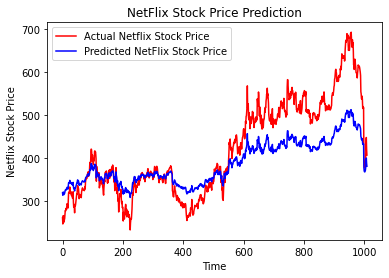

In [23]:
# Visualization
plt.plot(a_s_p,color='red',label='Actual Netflix Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted NetFlix Stock Price')
plt.title('NetFlix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()